In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8-dark')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('data/Energy_consumption_dataset.csv')
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


# EDA

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (5000, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None


In [5]:
print("\nFirst few rows:")
print(df.head())


First few rows:
   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
2      1     2  Saturday      No    28.704277  58.907658    1755.715009   
3      1     3  Saturday      No    20.080469  50.371637    1452.316318   
4      1     4  Saturday      No    23.097359  51.401421    1094.130359   

   Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
0          5        On           Off         2.774699          75.364373  
1          1        On            On        21.831384          83.401855  
2          2       Off           Off         6.764672          78.270888  
3          1       Off            On         8.623447          56.519850  
4          9        On           Off         3.071969          70.811732  


In [6]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             Month         Hour  Temperature     Humidity  SquareFootage  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      6.251200    11.556000    24.946823    45.478146    1507.403201   
std       3.588687     6.888306     3.041678     8.972690     293.147209   
min       1.000000     0.000000    20.007565    30.015975    1000.512661   
25%       3.000000     6.000000    22.453790    38.111104    1253.906598   
50%       6.000000    11.000000    24.831846    45.793124    1513.581105   
75%       9.000000    18.000000    27.427281    52.696651    1754.846457   
max      12.000000    23.000000    29.998671    59.969085    1999.982252   

         Occupancy  RenewableEnergy  EnergyConsumption  
count  5000.000000      5000.000000        5000.000000  
mean      4.576000        15.201195          76.794919  
std       2.906185         9.157038           9.231573  
min       0.000000         0.006642          53.263278  
25%  

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64


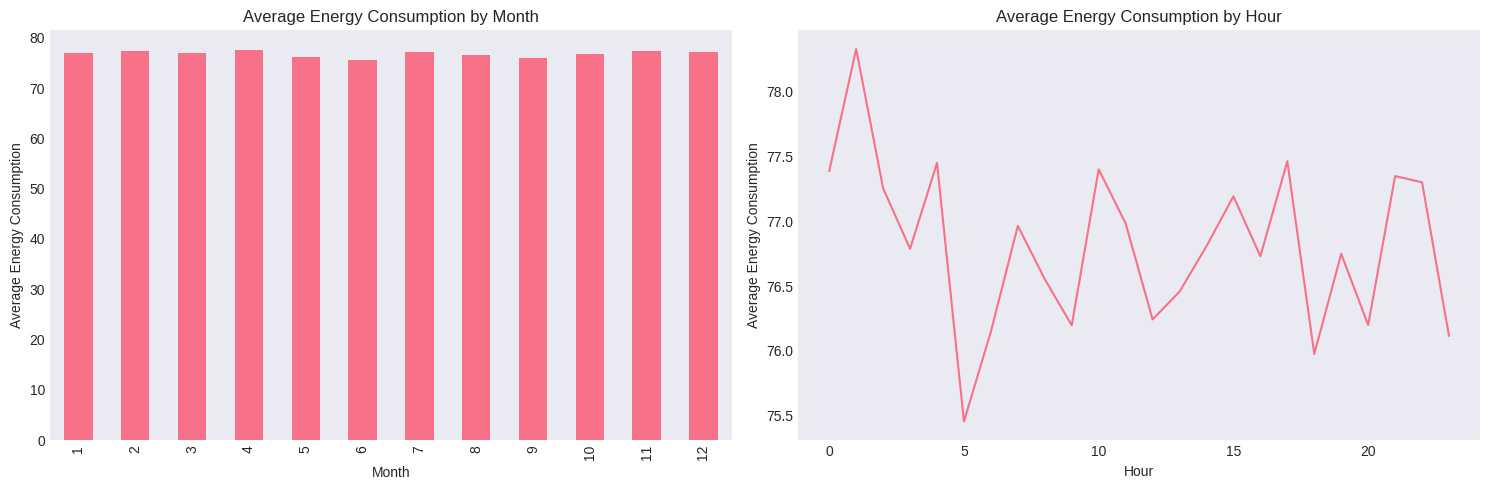

In [8]:
# Visualize energy consumption patterns across different time periods
plt.figure(figsize=(15, 5))

# Monthly patterns
plt.subplot(1, 2, 1)
df.groupby('Month')['EnergyConsumption'].mean().plot(kind='bar')
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')

# Hourly patterns
plt.subplot(1, 2, 2)
df.groupby('Hour')['EnergyConsumption'].mean().plot(kind='line')
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption')
plt.tight_layout()
plt.show()

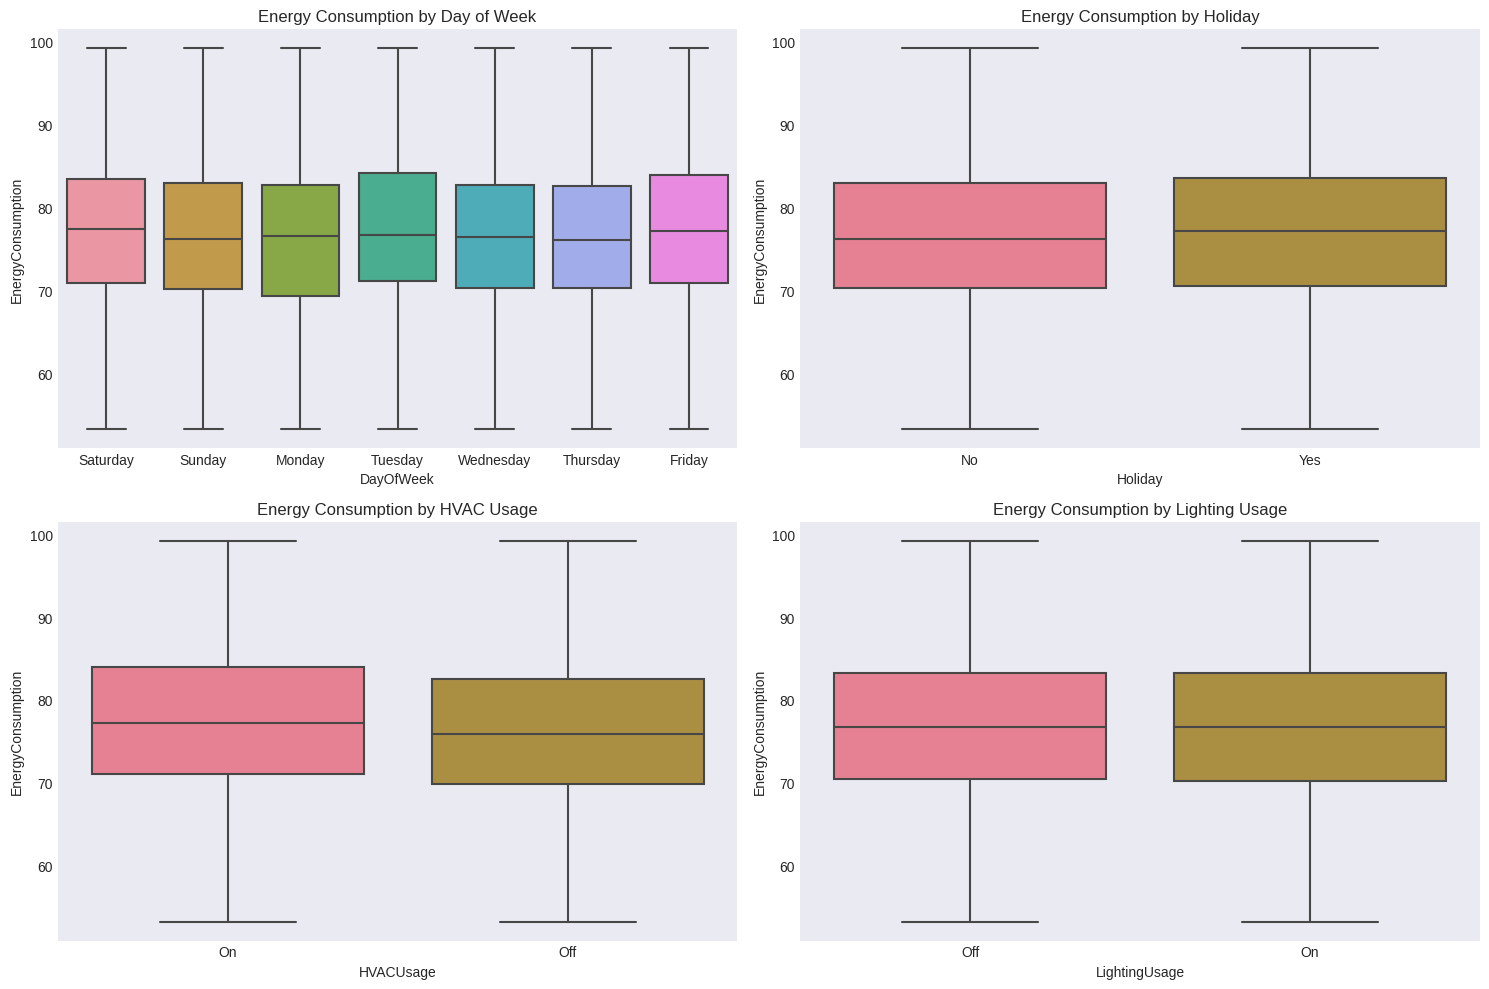

In [9]:
# Examine energy consumption patterns across different categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create box plots for each categorical variable
sns.boxplot(x='DayOfWeek', y='EnergyConsumption', data=df, ax=axes[0,0])
axes[0,0].set_title('Energy Consumption by Day of Week')

sns.boxplot(x='Holiday', y='EnergyConsumption', data=df, ax=axes[0,1])
axes[0,1].set_title('Energy Consumption by Holiday')

sns.boxplot(x='HVACUsage', y='EnergyConsumption', data=df, ax=axes[1,0])
axes[1,0].set_title('Energy Consumption by HVAC Usage')

sns.boxplot(x='LightingUsage', y='EnergyConsumption', data=df, ax=axes[1,1])
axes[1,1].set_title('Energy Consumption by Lighting Usage')

plt.tight_layout()
plt.show()

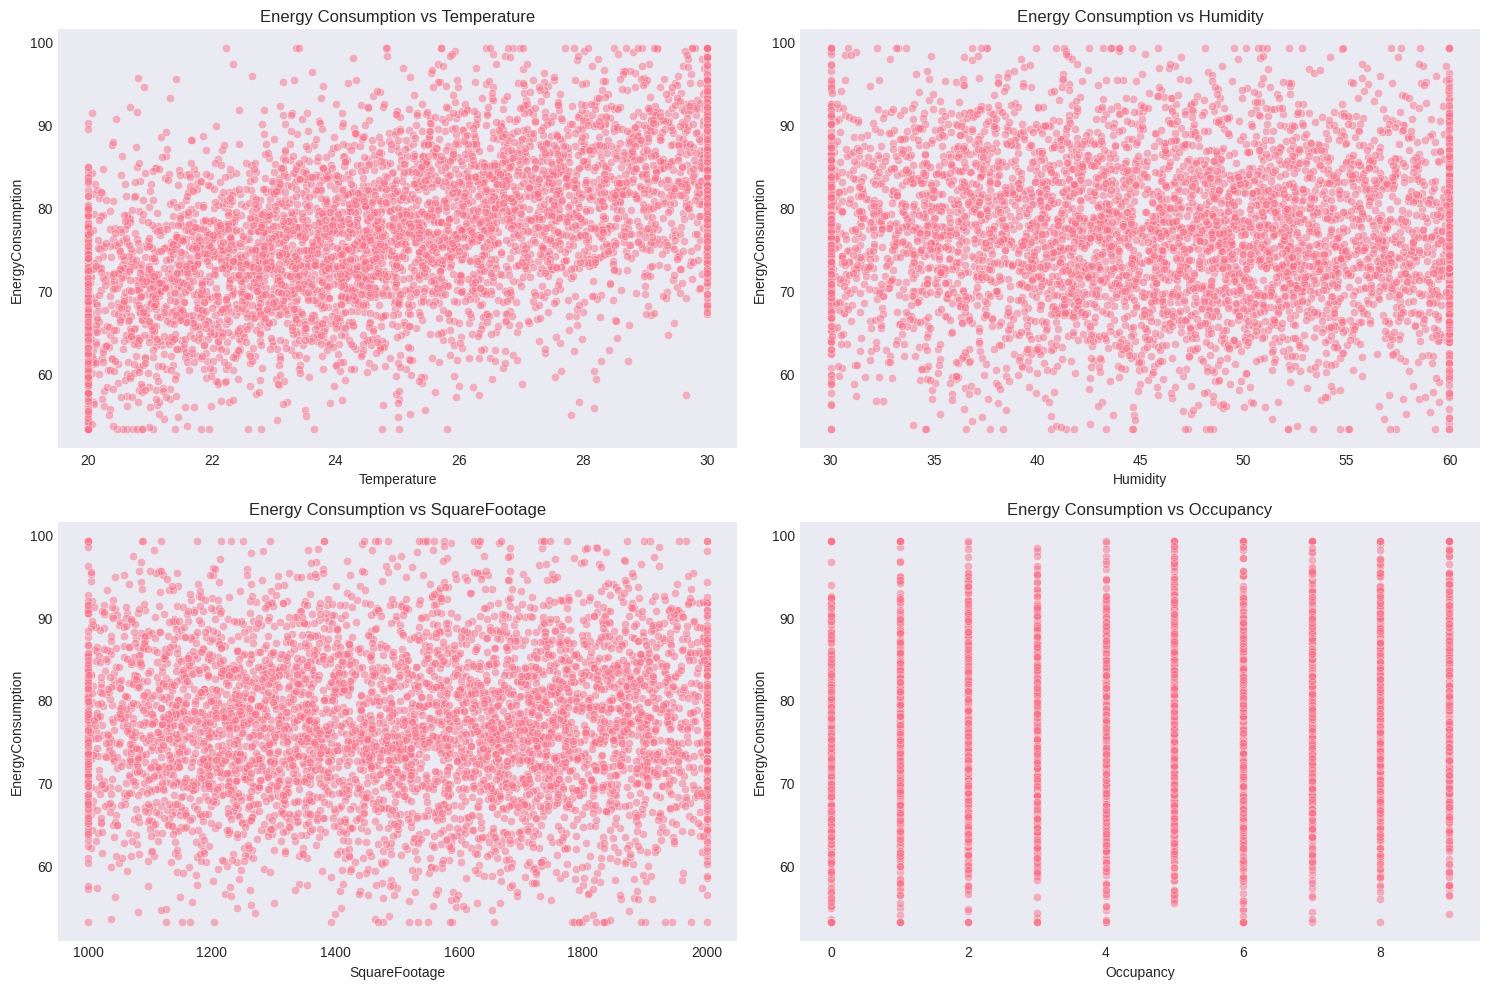

In [10]:
# Analyze relationships between numerical features and energy consumption
numerical_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='EnergyConsumption', alpha=0.5, ax=axes[idx])
    axes[idx].set_title(f'Energy Consumption vs {feature}')

plt.tight_layout()
plt.show()

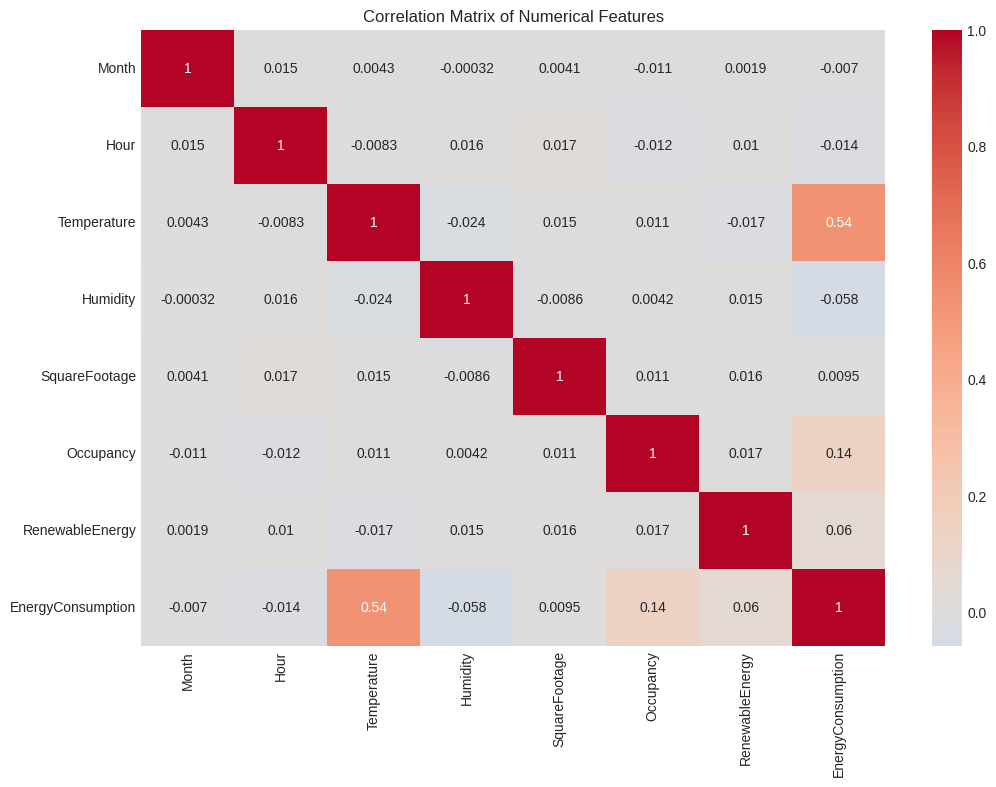

In [11]:
# Examine correlations between numerical variables
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


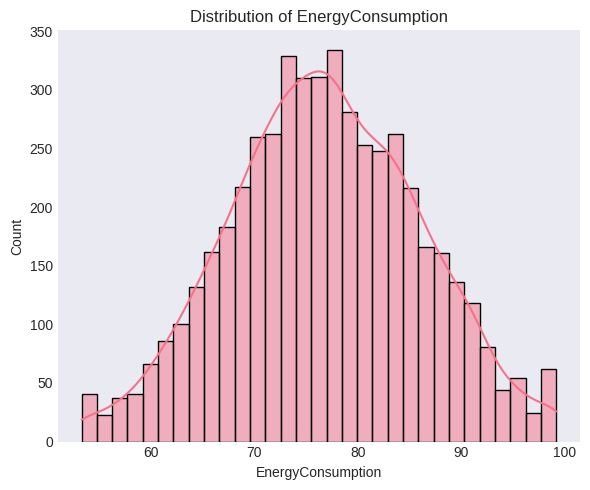

In [12]:
numerical_features = ['EnergyConsumption']

fig, axes = plt.subplots(1, len(numerical_features), figsize=(6 * len(numerical_features), 5))
if len(numerical_features) == 1:
    axes = [axes]  

for idx, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Energy Consumption Prediction


## 1. Setup and Configuration

Import required libraries and set up initial configurations.

In [13]:
# Standard libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model persistence
import joblib

## 2. Data Processing and Feature Engineering

In [14]:
# Separate features (X) and target (y)
X = df.drop(columns=["EnergyConsumption"]) 
y = df["EnergyConsumption"]

# Identify categorical and numerical columns
categorical_features = ["DayOfWeek", "Holiday", "HVACUsage", "LightingUsage"]
numerical_features = ["Month", "Hour", "Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy"]

# Create preprocessing pipelines
categorical_transformer = OneHotEncoder(drop="first", sparse_output=False)
numerical_transformer = StandardScaler()

# Combine preprocessing in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Apply preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Verify processed features
print(X_train.shape)
print(X_train[:5])

(4000, 16)
[[ 1.32340184 -0.22591269  0.1748494   0.79846705 -1.42535133  0.14591031
  -0.79418189  1.          0.          0.          0.          0.
   0.          1.          0.          0.        ]
 [ 1.60208315  0.64521593 -0.78021452  1.1019709  -0.21024242 -0.19821778
  -0.10773511  0.          1.          0.          0.          0.
   0.          1.          1.          1.        ]
 [-1.18473001 -0.51628889  0.20378505 -1.15663105  0.09691966  1.17829459
  -1.23980886  0.          0.          0.          1.          0.
   0.          0.          1.          0.        ]
 [ 0.7660392   1.66153264 -1.55813906  0.60863195 -0.4209848  -0.19821778
  -0.40425204  0.          1.          0.          0.          0.
   0.          1.          0.          0.        ]
 [ 1.04472052  0.06446352 -1.61514706  1.05946072  1.45366607  0.4900384
   0.16467466  0.          0.          1.          0.          0.
   0.          1.          0.          0.        ]]


## 3. Model Training

In [15]:
class ModelTrainer:
    """Handle model training and hyperparameter tuning."""
    
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
        self.scoring = {
            'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
            'r2': make_scorer(r2_score)
        }
    
    def get_param_grid(self):
        """Define parameter grids for model tuning."""
        return {
            'Ridge': {
                'model': Ridge(),
                'params': {
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                    'solver': ['auto'],
                    'fit_intercept': [True, False],
                    'positive': [True, False],
                    'tol': [1e-4, 1e-3, 1e-2],
                    'random_state': [42],
                    'max_iter': [1000, 3000, 5000]
                }
            },
            'Lasso': {
                'model': Lasso(),
                'params': {
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                    'selection': ['cyclic', 'random'],
                    'fit_intercept': [True, False],
                    'tol': [1e-4, 1e-3, 1e-2],
                    'warm_start': [True, False],
                    'positive': [True, False],
                    'random_state': [42],
                    'max_iter': [1000, 3000, 5000]
                }
            },
            'ElasticNet': {
                'model': ElasticNet(),
                'params': {
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                    'selection': ['cyclic', 'random'],
                    'fit_intercept': [True, False],
                    'tol': [1e-4, 1e-3, 1e-2],
                    'warm_start': [True, False],
                    'positive': [True, False],
                    'random_state': [42],
                    'max_iter': [1000, 3000, 5000]
                }
            }
        }

    def train_and_evaluate(self, X, y):
        """Train models and perform hyperparameter tuning."""
        param_grids = self.get_param_grid()
        best_models = {}
        
        for name, config in param_grids.items():
            print(f"\nTraining {name}...")
            grid_search = GridSearchCV(
                config['model'],
                config['params'],
                cv=self.cv,
                scoring=self.scoring,
                refit='r2',
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X, y)
            best_models[name] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'best_model': grid_search.best_estimator_
            }
        
        return best_models

# Initialize and run model training
trainer = ModelTrainer()
best_models = trainer.train_and_evaluate(X_train, y_train)


Training Ridge...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Training Lasso...
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits

Training ElasticNet...
Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


## 4. Model Evaluation

Model Evaluation Results:
   R2 Score        MSE      RMSE       MAE  Explained Variance       Model
0  0.315457  58.326440  7.637175  6.081832            0.315471       Ridge
1  0.315320  58.338062  7.637936  6.081501            0.315335       Lasso
2  0.315329  58.337305  7.637886  6.081374            0.315344  ElasticNet


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


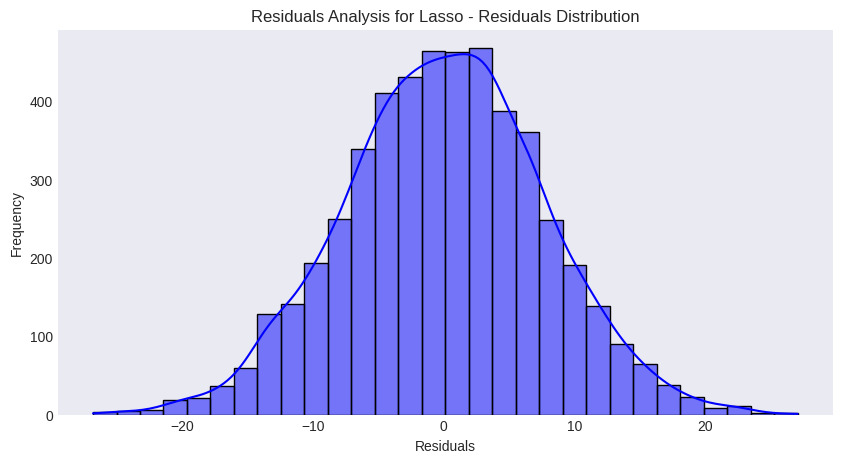

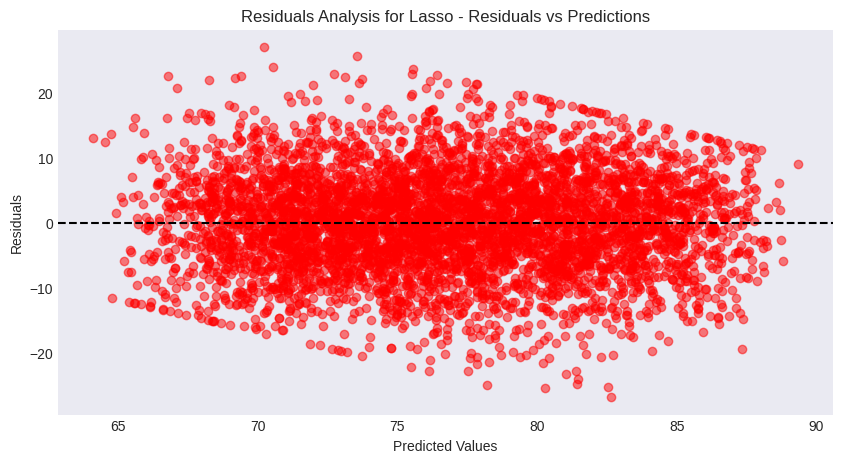

In [16]:
class ModelEvaluator:
    """Handle model evaluation and visualization."""
    
    def evaluate_model(self, model, X, y):
        """Evaluate a single model with various metrics."""
        predictions = model.predict(X)
        metrics = {
            'R2 Score': model.score(X, y),
            'MSE': mean_squared_error(y, predictions),
            'RMSE': np.sqrt(mean_squared_error(y, predictions)),
            'MAE': mean_absolute_error(y, predictions),
            'Explained Variance': explained_variance_score(y, predictions),
        }
        return metrics
    
    def evaluate_all_models(self, best_models, X, y):
        """Evaluate all models and compare metrics."""
        evaluation_results = []
        
        for name, results in best_models.items():
            metrics = self.evaluate_model(results['best_model'], X, y)
            metrics['Model'] = name
            evaluation_results.append(metrics)
        
        return pd.DataFrame(evaluation_results)
    
    def plot_residuals(self, model, X, y, title="Residuals Analysis"):
        """Plot residuals to assess model performance."""
        predictions = model.predict(X)
        residuals = y - predictions
        
        plt.figure(figsize=(10, 5))
        sns.histplot(residuals, kde=True, bins=30, color='blue')
        plt.title(f"{title} - Residuals Distribution")
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")
        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.scatter(predictions, residuals, alpha=0.5, color='red')
        plt.axhline(0, linestyle='--', color='black')
        plt.title(f"{title} - Residuals vs Predictions")
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.show()

# Select the best model
best_model_name = max(best_models.items(), key=lambda x: x[1]['best_score'])[0]
best_model = best_models[best_model_name]['best_model']

# ModelEvaluator for evaluation
evaluator = ModelEvaluator()

# Evaluate all models
evaluation_results = evaluator.evaluate_all_models(best_models, X_processed, y)
print("Model Evaluation Results:")
print(evaluation_results)

# Analyze residuals for the best model
evaluator.plot_residuals(best_model, X_processed, y, title=f"Residuals Analysis for {best_model_name}")